In [196]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kruskal, f_oneway
from scipy.stats import wilcoxon, ttest_ind
from IPython.display import display

In [197]:
stats = pd.read_excel("../Data/Experiments Analysis.xlsx", index_col=None)
print(stats.shape)
stats.head(3)

(60, 10)


,SUBJECT,EXP. COND. (HOLO),COLLISIONS_H,FAILURES_PICK_H,FAILURES_HANDOVER_H,TIME_H,COLLISIONS_NH,FAILURES_PICK_NH,FAILURES_HANDOVER_NH,TIME_NH
0,1,3,0,0,0,1205,0,0,0,1054
1,2,2,0,1,0,586,1,0,1,640
2,3,3,0,0,0,759,0,0,1,568


## Global MR vs no MR Analysis

### Collisions

In [198]:
collisions = stats[['EXP. COND. (HOLO)', 'COLLISIONS_H', 'COLLISIONS_NH']]
collisions = collisions.replace("NAN", np.nan)
collisions = collisions.dropna()

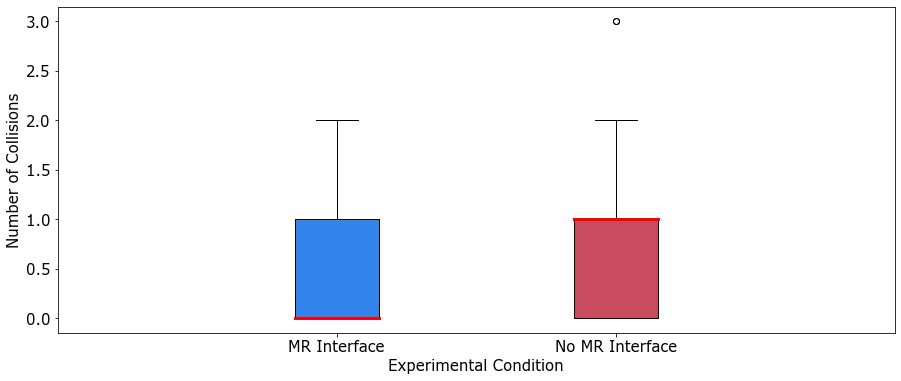

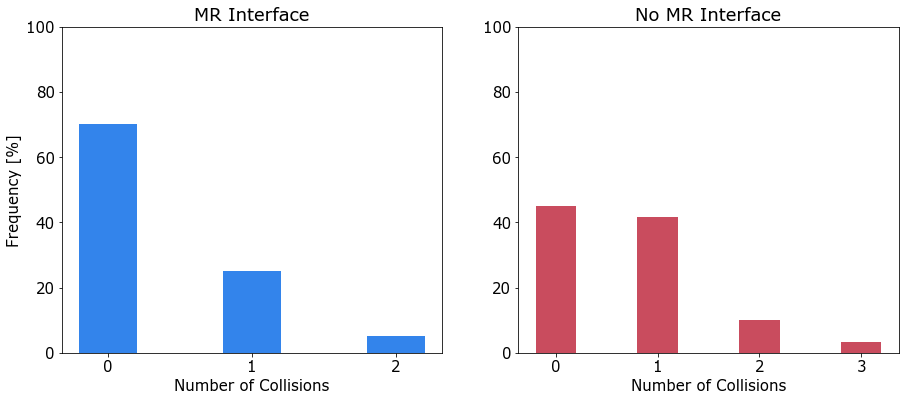

WilcoxonResult(statistic=570.5, pvalue=0.004823744533357468)


In [199]:
# Boxplots

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'Verdana'})

colors = {0: (0,0.4,0.9,0.8), 1: (0.7,0,0.1,0.7)}

fig = plt.figure(figsize=(15,6))

plt.xlabel("Experimental Condition")
plt.ylabel("Number of Collisions")

boxplot = plt.boxplot(collisions['COLLISIONS_H'], positions=[0], patch_artist=True)
boxplot['boxes'][0].set_facecolor(colors[0])
boxplot['medians'][0].set_linewidth(3)
boxplot['medians'][0].set_color('red')

boxplot = plt.boxplot(collisions['COLLISIONS_NH'], positions=[0.5], patch_artist=True)
boxplot['boxes'][0].set_facecolor(colors[1])
boxplot['medians'][0].set_linewidth(3)
boxplot['medians'][0].set_color('red')

plt.xticks([0, 0.5], ["MR Interface", "No MR Interface"])
    
display(fig)
plt.close()

# Plot as Histrograms

labels_h, counts_holo = np.unique(collisions['COLLISIONS_H'], return_counts=True)
labels_nh, counts_no_holo = np.unique(collisions['COLLISIONS_NH'], return_counts=True)

f, axs = plt.subplots(1,2,figsize=(15,6))

axs[0].bar(labels_h, 100 * counts_holo / len(collisions['COLLISIONS_H']), align='center', color=(0,0.4,0.9,0.8), width = 0.4)
axs[0].set_ylim(0,100)
axs[0].set_xticks(labels_h)
axs[0].set_title("MR Interface")
axs[0].set_xlabel("Number of Collisions")
axs[0].set_ylabel("Frequency [%]")

axs[1].bar(labels_nh, 100 * counts_no_holo / len(collisions['COLLISIONS_NH']), align='center', color=(0.7,0,0.1,0.7), width = 0.4)
axs[1].set_title("No MR Interface")
axs[1].set_ylim(0,100)
axs[1].set_xticks(labels_nh)
axs[1].set_xlabel("Number of Collisions")
    
display(f)
plt.close()
    
print(wilcoxon(x=collisions['COLLISIONS_H'],y=collisions['COLLISIONS_NH'], alternative="less", zero_method="zsplit")) 

### Failures

In [200]:
pick_failures = stats[['EXP. COND. (HOLO)', 'FAILURES_PICK_H', 'FAILURES_PICK_NH']]
pick_failures = pick_failures.replace("NAN", np.nan)
pick_failures = pick_failures.dropna()

hand_failures = stats[['EXP. COND. (HOLO)', 'FAILURES_HANDOVER_H', 'FAILURES_HANDOVER_NH']]
hand_failures = hand_failures.replace("NAN", np.nan)
hand_failures = hand_failures.dropna()

failures = stats[['EXP. COND. (HOLO)']]
failures['FAILURES_H'] = pick_failures['FAILURES_PICK_H'] + hand_failures['FAILURES_HANDOVER_H']
failures['FAILURES_NH'] = pick_failures['FAILURES_PICK_NH'] + hand_failures['FAILURES_HANDOVER_NH']

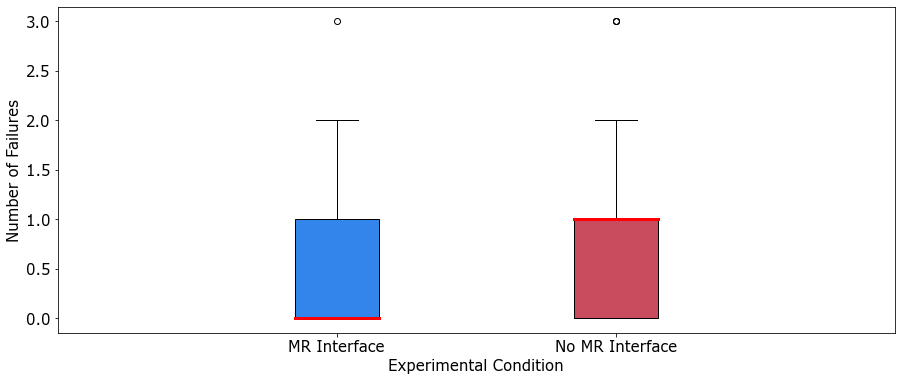

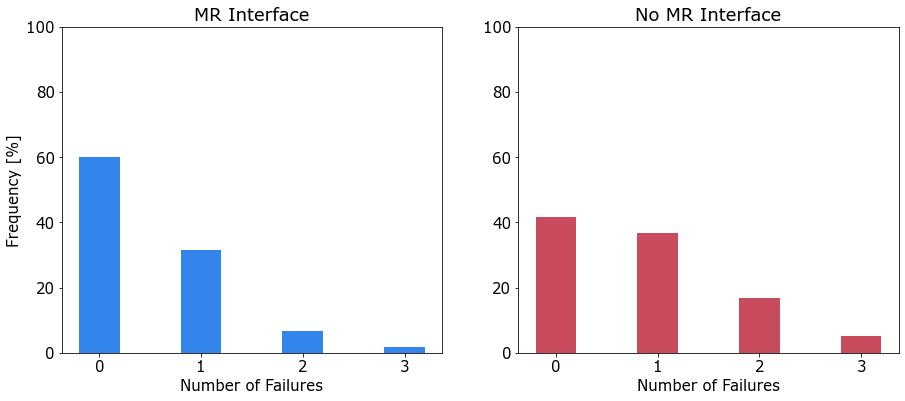

WilcoxonResult(statistic=583.5, pvalue=0.006484348214112675)


In [201]:
# Boxplots

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'Verdana'})

colors = {0: (0,0.4,0.9,0.8), 1: (0.7,0,0.1,0.7)}

fig = plt.figure(figsize=(15,6))

plt.xlabel("Experimental Condition")
plt.ylabel("Number of Failures")

boxplot = plt.boxplot(failures['FAILURES_H'], positions=[0], patch_artist=True)
boxplot['boxes'][0].set_facecolor(colors[0])
boxplot['medians'][0].set_linewidth(3)
boxplot['medians'][0].set_color('red')

boxplot = plt.boxplot(failures['FAILURES_NH'], positions=[0.5], patch_artist=True)
boxplot['boxes'][0].set_facecolor(colors[1])
boxplot['medians'][0].set_linewidth(3)
boxplot['medians'][0].set_color('red')

plt.xticks([0, 0.5], ["MR Interface", "No MR Interface"])
    
display(fig)
plt.close()

# Plot as Histrograms

labels_h, counts_holo = np.unique(failures['FAILURES_H'], return_counts=True)
labels_nh, counts_no_holo = np.unique(failures['FAILURES_NH'], return_counts=True)

f, axs = plt.subplots(1,2,figsize=(15,6))

axs[0].bar(labels_h, 100 * counts_holo / len(failures['FAILURES_H']), align='center', color=(0,0.4,0.9,0.8), width = 0.4)
axs[0].set_ylim(0,100)
axs[0].set_xticks(labels_h)
axs[0].set_title("MR Interface")
axs[0].set_xlabel("Number of Failures")
axs[0].set_ylabel("Frequency [%]")

axs[1].bar(labels_nh, 100 * counts_no_holo / len(failures['FAILURES_NH']), align='center', color=(0.7,0,0.1,0.7), width = 0.4)
axs[1].set_title("No MR Interface")
axs[1].set_ylim(0,100)
axs[1].set_xticks(labels_nh)
axs[1].set_xlabel("Number of Failures")
    
display(f)
plt.close()
    
print(wilcoxon(x=failures['FAILURES_H'],y=failures['FAILURES_NH'], alternative="less", zero_method="zsplit")) 

## Differential Analysis

### Collisions

In [202]:
collisions = stats[['EXP. COND. (HOLO)', 'COLLISIONS_H', 'COLLISIONS_NH']]
collisions = collisions.replace("NAN", np.nan)
collisions = collisions.dropna()

collisions['Diff'] = abs(collisions['COLLISIONS_NH'] - collisions['COLLISIONS_H'])

c1 = collisions[collisions['EXP. COND. (HOLO)'] == 1].values
c2 = collisions[collisions['EXP. COND. (HOLO)'] == 2].values
c3 = collisions[collisions['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

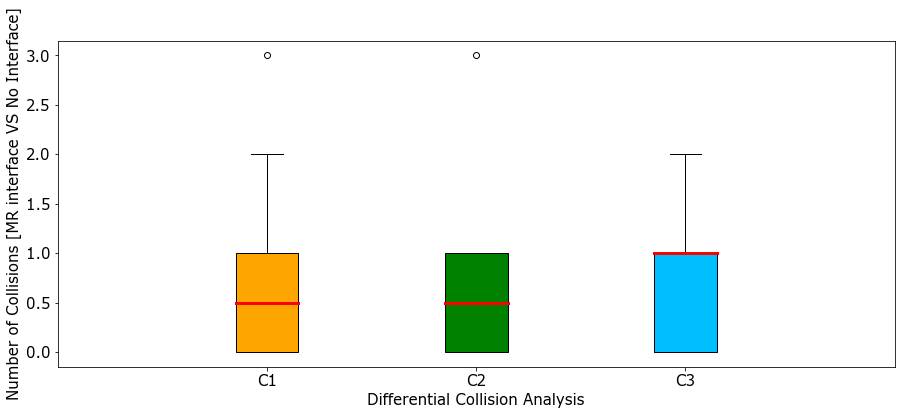

KruskalResult(statistic=0.4242425752441789, pvalue=0.8088665861119504)

In [203]:
groups = list(conditions.keys())
colors = {0: "orange", 1: "green", 2: "deepskyblue"}

fig = plt.figure(figsize=(15,6))

for i,c in enumerate(conditions.keys()):
        
    boxplot = plt.boxplot(conditions[c][:,3], positions=[(0.5)*i], patch_artist=True)
    boxplot['boxes'][0].set_facecolor(colors[i])
    boxplot['medians'][0].set_linewidth(3)
    boxplot['medians'][0].set_color('red')
    

plt.xlabel("Differential Collision Analysis")
plt.ylabel("Number of Collisions [MR interface VS No Interface]")
plt.xticks([0, 0.5, 1], groups)
display(fig)

plt.close()

kruskal(c1[:,3],c2[:,3],c3[:,3])

### Failures

In [204]:
pick_failures = stats[['EXP. COND. (HOLO)', 'FAILURES_PICK_H', 'FAILURES_PICK_NH']]
pick_failures = pick_failures.replace("NAN", np.nan)
pick_failures = pick_failures.dropna()

hand_failures = stats[['EXP. COND. (HOLO)', 'FAILURES_HANDOVER_H', 'FAILURES_HANDOVER_NH']]
hand_failures = hand_failures.replace("NAN", np.nan)
hand_failures = hand_failures.dropna()

failures = stats[['EXP. COND. (HOLO)']]
failures['FAILURES_H'] = pick_failures['FAILURES_PICK_H'] + hand_failures['FAILURES_HANDOVER_H']
failures['FAILURES_NH'] = pick_failures['FAILURES_PICK_NH'] + hand_failures['FAILURES_HANDOVER_NH']

failures['Diff'] = abs(failures['FAILURES_NH'] - failures['FAILURES_H'])

c1 = failures[failures['EXP. COND. (HOLO)'] == 1].values
c2 = failures[failures['EXP. COND. (HOLO)'] == 2].values
c3 = failures[failures['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

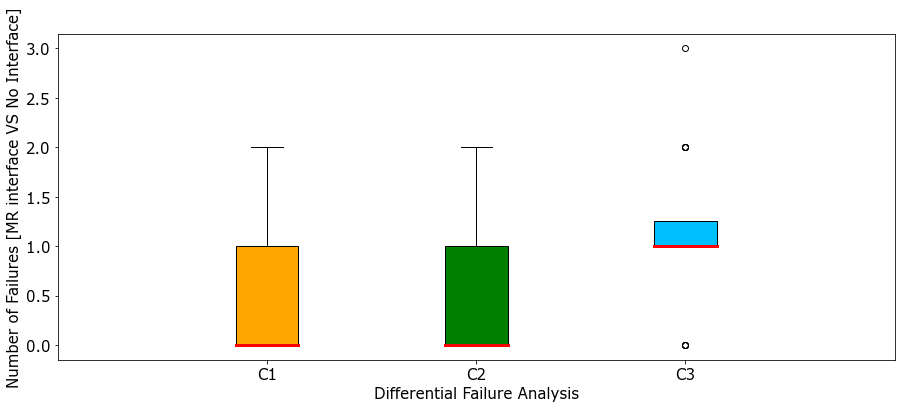

KruskalResult(statistic=6.313391058548302, pvalue=0.04256616758979635)

In [205]:
groups = list(conditions.keys())
colors = {0: "orange", 1: "green", 2: "deepskyblue"}

fig = plt.figure(figsize=(15,6))

for i,c in enumerate(conditions.keys()):
        
    boxplot = plt.boxplot(conditions[c][:,3], positions=[(0.5)*i], patch_artist=True)
    boxplot['boxes'][0].set_facecolor(colors[i])
    boxplot['medians'][0].set_linewidth(3)
    boxplot['medians'][0].set_color('red')
    

plt.xlabel("Differential Failure Analysis")
plt.ylabel("Number of Failures [MR interface VS No Interface]")
plt.xticks([0, 0.5, 1], groups)
display(fig)

plt.close()

kruskal(c1[:,3],c2[:,3],c3[:,3])